## Feature Extraction with HOG - Histogram of oriented gradients

#### useful links

https://towardsdatascience.com/hog-histogram-of-oriented-gradients-67ecd887675f

https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

https://www.thepythoncode.com/article/hog-feature-extraction-in-python

https://www.kaggle.com/anirbanmalick/image-classification-using-hog-knn-98-acc

https://medium.com/swlh/histogram-of-oriented-gradients-hog-for-multiclass-image-classification-and-image-recommendation-cf0ea2caaae8

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.transform import resize
import math
from skimage.feature import hog
import numpy as np
import pandas as pd
from PIL import Image
from skimage import data, exposure
import pathlib

In [2]:
# read in all train images
df = pd.read_csv('data/train_complete.csv')

In [3]:
# read in a single image as example
image = io.imread("data/train_images/0030401a5.jpg")

In [4]:
image.shape

(256, 1600, 3)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

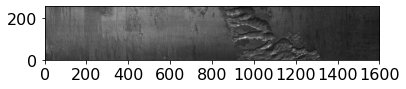

In [5]:
plt.imshow(image)
plt.xlim(0,1600)
plt.ylim(0,256)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### Parameters we need to pass in the function to calculate the HOG features

The hog() function takes 6 parameters as input:

**image**: The target image you want to apply HOG feature extraction.

**orientations**: Number of bins in the histogram we want to create, the original research paper used 9 bins so we will pass 9 as orientations.

**pixels_per_cell**: Determines the size of the cell, as we mentioned earlier, it is 8x8.

**cells_per_block**: Number of cells per block, will be 2x2 as mentioned previously. ==> used for normalisation (16*16)

**visualize**: A boolean whether to return the image of the HOG, we set it to True so we can show the image.

**multichannel**: We set it to True to tell the function that the last dimension is considered as a color channel, instead of spatial.

In [6]:
resized_img = resize(image, (64,128))

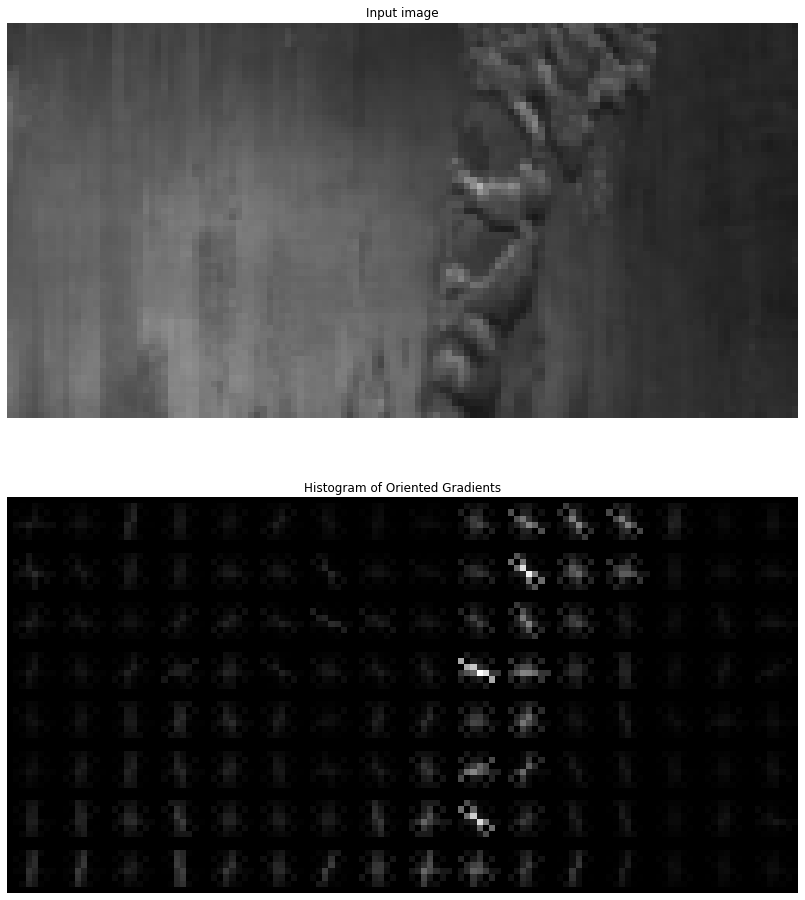

In [7]:
#with resized picture

fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(32, 16), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [8]:
# fd is Feature Matrix
fd.shape

(3780,)

In [9]:
hog_image

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00086003, ..., 0.00190923, 0.        ,
        0.        ],
       [0.        , 0.00256643, 0.        , ..., 0.        , 0.00124825,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00284719,
        0.        ],
       [0.        , 0.        , 0.00475563, ..., 0.00179167, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Create HoG for all images in train_images

In [10]:
# get current working directory
cwd = pathlib.Path.cwd()
train_data_dir = cwd.joinpath('data', 'train_images')

In [11]:
train_images = list(train_data_dir.glob('*.jpg'))

In [12]:
# create list for images, imageIds and features
hog_images = []
hog_features = []
Image_Ids = []
# create HOG features and images
for image in train_images:
    Image_Ids.append(image.name)
    image = io.imread("data/train_images/"+image.name)
    resized_img = resize(image, (64,128))
    fd,hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,channel_axis=-1)
    hog_images.append(hog_image)
    hog_features.append(fd)
  
hog_features = np.array(hog_features)

hog_features.shape

(12568, 3780)

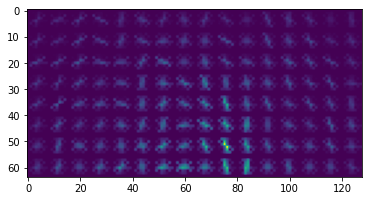

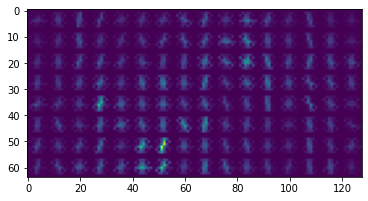

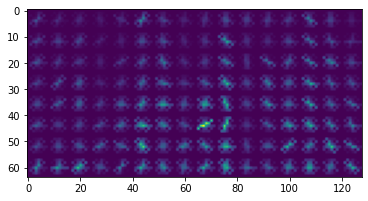

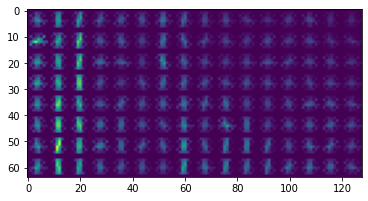

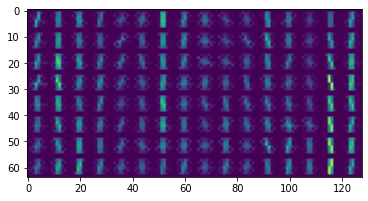

In [13]:
for img in hog_images[:5]:
    plt.imshow(img)
    plt.show()

In [14]:
hog_features= pd.DataFrame(hog_features)
hog_features

,0,1,2,3,4,5,6,7,8,9,...,3770,3771,3772,3773,3774,3775,3776,3777,3778,3779
0,0.260472,0.168138,0.260472,0.124914,0.117598,0.000000,0.023278,0.078617,0.071638,0.125196,...,0.244573,0.234058,0.048746,0.040422,0.015478,0.129134,0.126747,0.194180,0.159938,0.224502
1,0.178531,0.146213,0.230136,0.135276,0.239207,0.089580,0.097348,0.154742,0.089257,0.239207,...,0.275924,0.231136,0.044045,0.074165,0.047504,0.084607,0.057752,0.091826,0.118711,0.147404
2,0.233020,0.233020,0.233020,0.221273,0.198087,0.087594,0.057336,0.024053,0.085179,0.192792,...,0.166959,0.152660,0.048371,0.032045,0.092339,0.158407,0.255698,0.255698,0.255698,0.049551
3,0.199433,0.128030,0.110016,0.008214,0.155047,0.088910,0.155657,0.077873,0.260184,0.260184,...,0.223840,0.221356,0.080780,0.033171,0.142762,0.186500,0.197350,0.193555,0.223840,0.068564
4,0.357059,0.189545,0.000000,0.004834,0.050835,0.033951,0.123951,0.057806,0.084447,0.357059,...,0.361479,0.361479,0.050235,0.024185,0.011188,0.037392,0.007501,0.008185,0.022333,0.227738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12563,0.307184,0.107164,0.036760,0.026387,0.125121,0.010923,0.079981,0.062923,0.206235,0.307184,...,0.258013,0.258013,0.074292,0.158503,0.043032,0.152954,0.043528,0.073125,0.113606,0.258013
12564,0.281730,0.240874,0.014224,0.055766,0.104895,0.012058,0.019042,0.092117,0.315406,0.315406,...,0.427692,0.242380,0.006836,0.000000,0.000000,0.002948,0.000000,0.000000,0.007591,0.137132
12565,0.117363,0.147319,0.253654,0.165281,0.239857,0.021668,0.016932,0.054552,0.125060,0.218005,...,0.204958,0.148534,0.045345,0.034623,0.076894,0.240943,0.172085,0.217826,0.186055,0.240943
12566,0.212728,0.242484,0.108226,0.047673,0.080457,0.144715,0.122294,0.122211,0.198313,0.181952,...,0.278250,0.278250,0.149900,0.062754,0.023076,0.143293,0.053385,0.050405,0.278250,0.278250


In [15]:
Image_Ids= pd.DataFrame(Image_Ids)
Image_Ids.rename(columns={0: 'ImageId'}, inplace=True)
Image_Ids

,ImageId
0,58ee62fd7.jpg
1,eeffa4c49.jpg
2,0dced41aa.jpg
3,bd2366c49.jpg
4,e2bdd4236.jpg
...,...
12563,cc00b69e7.jpg
12564,3a0e5cad8.jpg
12565,17d02873a.jpg
12566,97192a78b.jpg


In [16]:
hog_complete = pd.concat([hog_features, Image_Ids], axis=1, ignore_index=False)
hog_complete

,0,1,2,3,4,5,6,7,8,9,...,3771,3772,3773,3774,3775,3776,3777,3778,3779,ImageId
0,0.260472,0.168138,0.260472,0.124914,0.117598,0.000000,0.023278,0.078617,0.071638,0.125196,...,0.234058,0.048746,0.040422,0.015478,0.129134,0.126747,0.194180,0.159938,0.224502,58ee62fd7.jpg
1,0.178531,0.146213,0.230136,0.135276,0.239207,0.089580,0.097348,0.154742,0.089257,0.239207,...,0.231136,0.044045,0.074165,0.047504,0.084607,0.057752,0.091826,0.118711,0.147404,eeffa4c49.jpg
2,0.233020,0.233020,0.233020,0.221273,0.198087,0.087594,0.057336,0.024053,0.085179,0.192792,...,0.152660,0.048371,0.032045,0.092339,0.158407,0.255698,0.255698,0.255698,0.049551,0dced41aa.jpg
3,0.199433,0.128030,0.110016,0.008214,0.155047,0.088910,0.155657,0.077873,0.260184,0.260184,...,0.221356,0.080780,0.033171,0.142762,0.186500,0.197350,0.193555,0.223840,0.068564,bd2366c49.jpg
4,0.357059,0.189545,0.000000,0.004834,0.050835,0.033951,0.123951,0.057806,0.084447,0.357059,...,0.361479,0.050235,0.024185,0.011188,0.037392,0.007501,0.008185,0.022333,0.227738,e2bdd4236.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12563,0.307184,0.107164,0.036760,0.026387,0.125121,0.010923,0.079981,0.062923,0.206235,0.307184,...,0.258013,0.074292,0.158503,0.043032,0.152954,0.043528,0.073125,0.113606,0.258013,cc00b69e7.jpg
12564,0.281730,0.240874,0.014224,0.055766,0.104895,0.012058,0.019042,0.092117,0.315406,0.315406,...,0.242380,0.006836,0.000000,0.000000,0.002948,0.000000,0.000000,0.007591,0.137132,3a0e5cad8.jpg
12565,0.117363,0.147319,0.253654,0.165281,0.239857,0.021668,0.016932,0.054552,0.125060,0.218005,...,0.148534,0.045345,0.034623,0.076894,0.240943,0.172085,0.217826,0.186055,0.240943,17d02873a.jpg
12566,0.212728,0.242484,0.108226,0.047673,0.080457,0.144715,0.122294,0.122211,0.198313,0.181952,...,0.278250,0.149900,0.062754,0.023076,0.143293,0.053385,0.050405,0.278250,0.278250,97192a78b.jpg


In [17]:
# create csv for HOG features
hog_complete.to_csv('data/train_HOG.csv', sep=',',index=False)

## Use HOG Features in a k-Nearest-Neighbor model

**Ressources**

- [Image Classification using SVM](https://rpubs.com/Sharon_1684/454441)

In [18]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.transform import resize
import math
from skimage.feature import hog
import numpy as np
import pandas as pd
from PIL import Image
from skimage import data, exposure
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm

In [19]:
# self-written scripts
import sys
sys.path.insert(0, 'Python_Scripts')

import util
import surf_hog_analysis 

---

## Use HOG Feature Vector (based on 4 imbalanced classes in train_images) in k-NN

---

### Data preparation

In [20]:
df = pd.read_csv('data/train_complete.csv')

In [21]:
hog = pd.read_csv('data/train_HOG.csv')

In [22]:
# isolate only images that have 0 or 1 defect
util.isolate_single_defects(hog)

In [23]:
hog_complete = hog.merge(df[['ClassId','ImageId']], on = 'ImageId')
hog_complete.head()

,0,1,2,3,4,5,6,7,8,9,...,3772,3773,3774,3775,3776,3777,3778,3779,ImageId,ClassId
0,0.260472,0.168138,0.260472,0.124914,0.117598,0.000000,0.023278,0.078617,0.071638,0.125196,...,0.048746,0.040422,0.015478,0.129134,0.126747,0.194180,0.159938,0.224502,58ee62fd7.jpg,3
1,0.233020,0.233020,0.233020,0.221273,0.198087,0.087594,0.057336,0.024053,0.085179,0.192792,...,0.048371,0.032045,0.092339,0.158407,0.255698,0.255698,0.255698,0.049551,0dced41aa.jpg,0
2,0.199433,0.128030,0.110016,0.008214,0.155047,0.088910,0.155657,0.077873,0.260184,0.260184,...,0.080780,0.033171,0.142762,0.186500,0.197350,0.193555,0.223840,0.068564,bd2366c49.jpg,0
3,0.357059,0.189545,0.000000,0.004834,0.050835,0.033951,0.123951,0.057806,0.084447,0.357059,...,0.050235,0.024185,0.011188,0.037392,0.007501,0.008185,0.022333,0.227738,e2bdd4236.jpg,3
4,0.148689,0.130765,0.193046,0.264011,0.266173,0.134977,0.046870,0.030897,0.026977,0.115430,...,0.102538,0.195246,0.184212,0.225130,0.222193,0.224301,0.075570,0.216802,5210ac609.jpg,3


In [24]:
# eliminate class 0 in dataframe
hog_complete = hog_complete.query('ClassId != 0')

In [25]:
hog_complete.groupby('ClassId')['ImageId'].count()

ClassId
1     769
2     195
3    4759
4     516
Name: ImageId, dtype: int64

In [26]:
#Split Hog_complete in X und Y
X = hog_complete.drop(['ClassId','ImageId'], axis =1)
y = hog_complete['ClassId']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state = 42)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(4991, 3780), (4991,)
Test data and target sizes: 
(1248, 3780), (1248,)


In [28]:
test_accuracy = []
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=3,algorithm='brute')
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)
test_accuracy = classifier.score((X_test_scaled), y_test)
print(test_accuracy)

0.7940705128205128


[[121   6  27   0]
 [  9  24   6   0]
 [ 90  16 846   0]
 [ 29   0  74   0]]


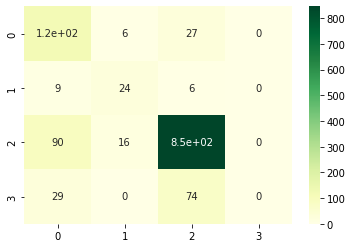

In [29]:
print(metrics.confusion_matrix(y_test,y_pred))
# Print confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.16      0.49      0.24       309
           2       0.09      0.97      0.16        76
           3       0.00      0.00      0.00      1893
           4       0.15      0.50      0.23       218

    accuracy                           0.13      2496
   macro avg       0.10      0.49      0.16      2496
weighted avg       0.04      0.13      0.06      2496



/Users/danielastuermer/neuefische/CapstoneProject_SteelDefectDetection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielastuermer/neuefische/CapstoneProject_SteelDefectDetection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielastuermer/neuefische/CapstoneProject_SteelDefectDetection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no

---

### Visualization of falsely predicted pictures

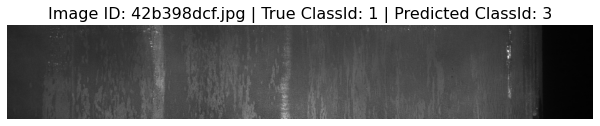

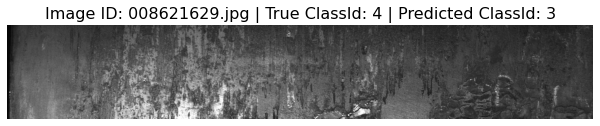

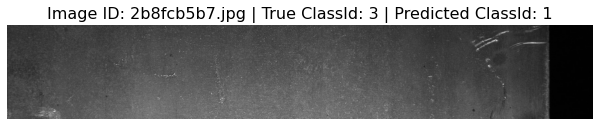

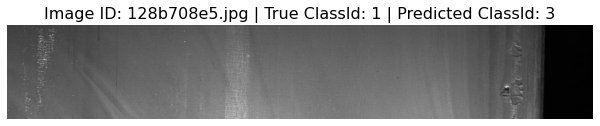

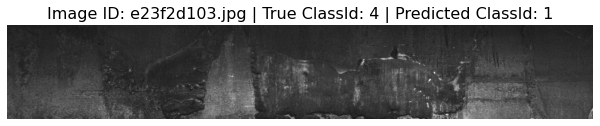

In [31]:
# print out several misclassified images
surf_hog_analysis.print_false_classifications(df, hog_complete, y_test, y_pred)

### Use augmented hog pictures for Training an initial hog pictures for test

In [33]:
# read in data for train and test
df_train = pd.read_csv('data/train_set_augmented.csv')
df_test = pd.read_csv('data/test_set_for_augmented.csv')

In [34]:
# retrieve hog features for test images
ids = df_test.ImageId.to_list()
df_test_hog = hog_complete.query('ImageId == @ids')

In [35]:
# retrieve data from augmentation split
X_test = df_test_hog.copy()
X_test.pop('ImageId')
y_test = X_test.pop('ClassId')

In [36]:
# augmented pictures are based on single defect pictures of classes 1-4
hog_augmented = pd.read_csv('data/train_HOG_augmented.csv')
hog_augmented = pd.merge(hog_augmented, df_train[['ImageId', 'ClassId']], on='ImageId')

In [37]:
X_train = hog_augmented.copy()
X_train.pop('ImageId')
y_train = X_train.pop('ClassId')

In [38]:
test_accuracy = []
scaler = StandardScaler()

# scale the features (X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#build the model
classifier = KNeighborsClassifier(n_neighbors=3,algorithm='brute')
classifier.fit(X_train_scaled, y_train)

# make prediction
y_pred = classifier.predict(X_test_scaled)
test_accuracy = classifier.score((X_test_scaled), y_test)
print(test_accuracy)

0.13381410256410256


[[151 114   0  44]
 [  1  74   0   1]
 [684 652   0 557]
 [103   6   0 109]]


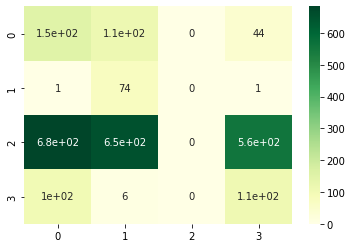

In [39]:
print(metrics.confusion_matrix(y_test,y_pred))
# Print confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

In [40]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.16      0.49      0.24       309
           2       0.09      0.97      0.16        76
           3       0.00      0.00      0.00      1893
           4       0.15      0.50      0.23       218

    accuracy                           0.13      2496
   macro avg       0.10      0.49      0.16      2496
weighted avg       0.04      0.13      0.06      2496



/Users/danielastuermer/neuefische/CapstoneProject_SteelDefectDetection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielastuermer/neuefische/CapstoneProject_SteelDefectDetection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielastuermer/neuefische/CapstoneProject_SteelDefectDetection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no